In [92]:
import fbprophet

In [93]:
path = r"D:\Asus\Documents\archive\AAPL.csv"

In [94]:
import pandas as pd

In [95]:
from fbprophet import Prophet

In [96]:
file= pd.read_csv(path, date_parser='Date')

In [97]:
file.set_index('Date', inplace=True)

In [98]:
file.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-19,267.899994,268.000000,265.390015,266.290009,266.290009,19041800.0
2019-11-20,265.540009,266.079987,260.399994,263.190002,263.190002,26558600.0
2019-11-21,263.690002,264.010010,261.179993,262.010010,262.010010,30348800.0
2019-11-22,262.589996,263.179993,260.839996,261.779999,261.779999,16331300.0
2019-11-25,262.709991,266.440002,262.519989,266.369995,266.369995,21005100.0


In [99]:
file.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9.822000e+03
mean,30.350057,30.640633,30.048298,30.352940,28.364033,8.620720e+07
std,53.443016,53.908364,52.983661,53.464270,51.603590,8.623138e+07
min,0.198661,0.198661,0.196429,0.196429,0.156008,3.472000e+05
25%,1.062500,1.085357,1.043571,1.066964,0.914089,3.318138e+07
50%,1.709286,1.742366,1.671429,1.712857,1.452872,5.798940e+07
75%,30.393928,30.555714,29.865358,30.233214,26.305946,1.076320e+08
max,267.899994,268.000000,265.390015,267.100006,267.100006,1.855410e+09


In [100]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9823 entries, 1980-12-12 to 2019-11-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9822 non-null   float64
 1   High       9822 non-null   float64
 2   Low        9822 non-null   float64
 3   Close      9822 non-null   float64
 4   Adj Close  9822 non-null   float64
 5   Volume     9822 non-null   float64
dtypes: float64(6)
memory usage: 537.2+ KB


In [101]:
file.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [102]:
file.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis= 1, inplace=True)

In [103]:
file.set_index(pd.to_datetime(file.index),inplace=True)

In [104]:
f2=file.resample("M").mean()

In [105]:
import matplotlib.pyplot as plt

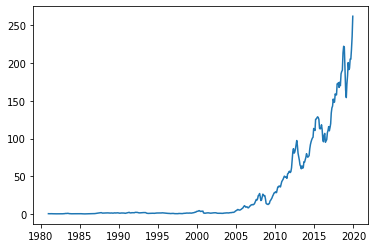

In [106]:
plt.plot(f2['Close'])

In [107]:
import statsmodels.tsa.seasonal as sts

In [108]:
f2.isna().sum()

Close    0
dtype: int64

In [109]:
file.fillna(method='ffill',axis=1,inplace=True)

In [110]:
compo=sts.seasonal_decompose(f2)

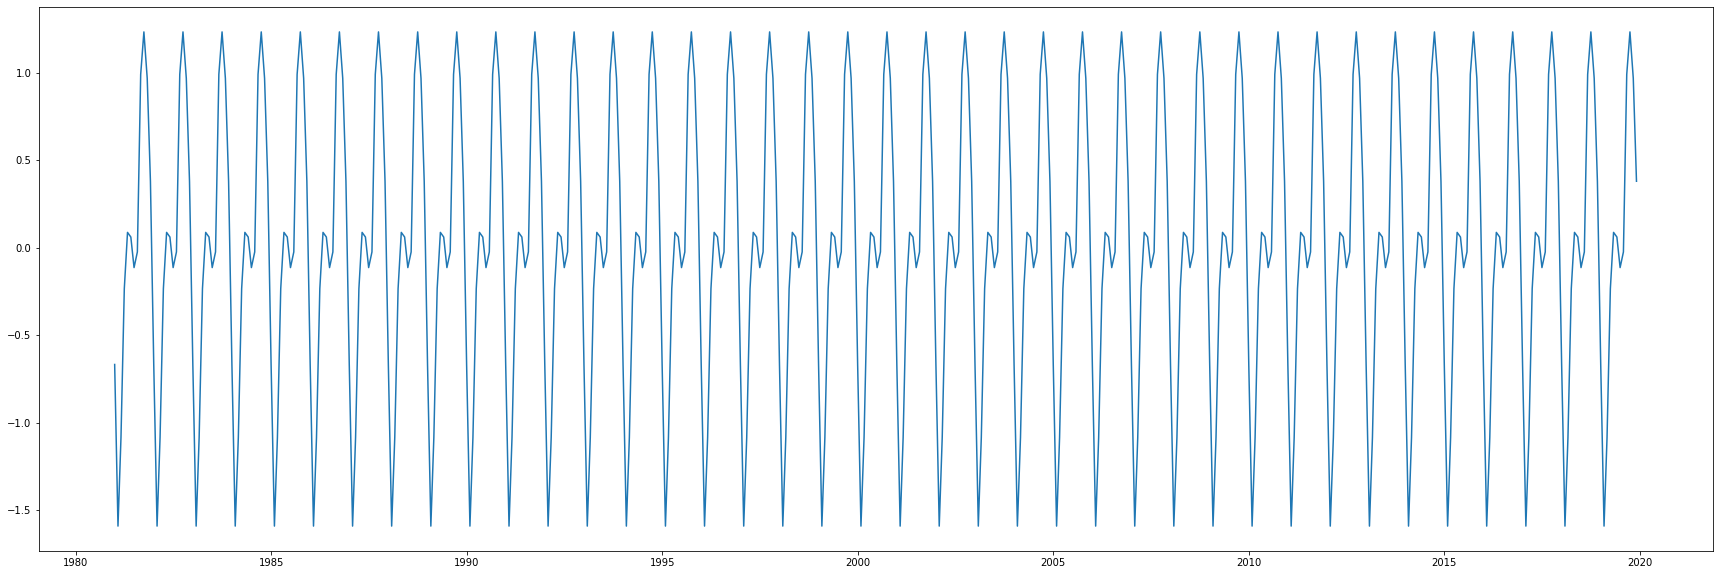

In [111]:
plt.figure(figsize=[30,10])
plt.plot(compo.seasonal)

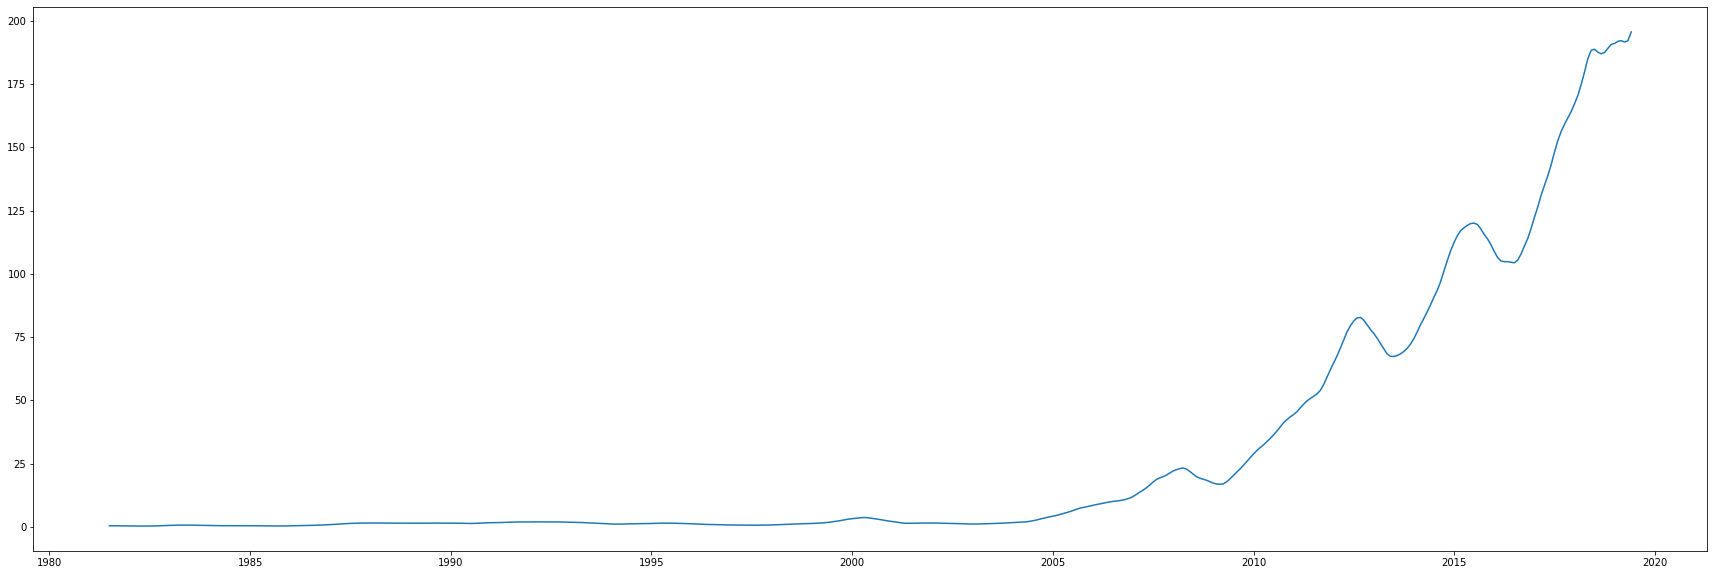

In [112]:
plt.figure(figsize=[30,10])
plt.plot(compo.trend)

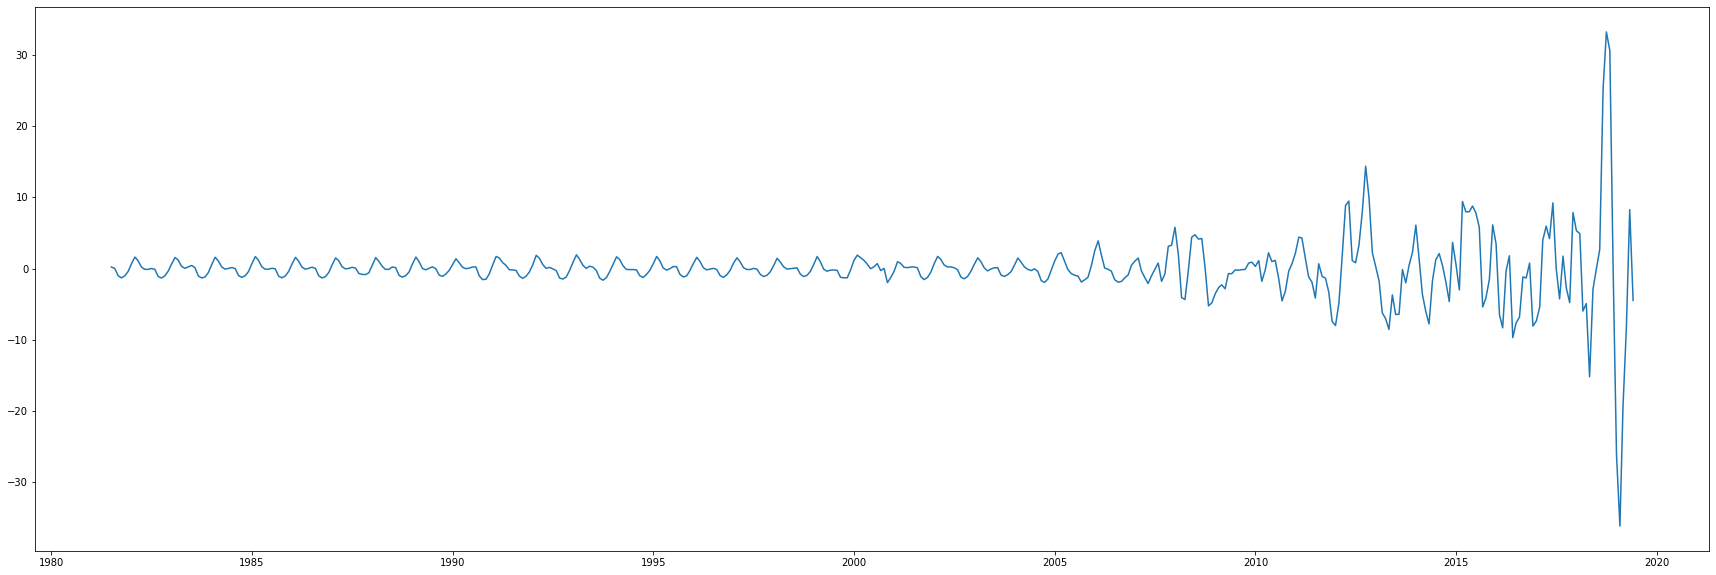

In [113]:
plt.figure(figsize=[30,10])
plt.plot(compo.resid)

In [114]:
file.isna().sum()

Close    1
dtype: int64

In [115]:
file['Close'].shape

(9823,)

In [116]:
file[file['Close'].isna()]

,Close
Date,
1981-08-10,NaN


In [117]:
file.index[12]

Timestamp('1980-12-31 00:00:00')

In [118]:
f2['Close'].rolling(12).mean()

Date
1980-12-31           NaN
1981-01-31           NaN
1981-02-28           NaN
1981-03-31           NaN
1981-04-30           NaN
                 ...    
2019-07-31    192.577545
2019-08-31    191.878515
2019-09-30    191.538625
2019-10-31    192.742030
2019-11-30    198.624496
Freq: M, Name: Close, Length: 468, dtype: float64

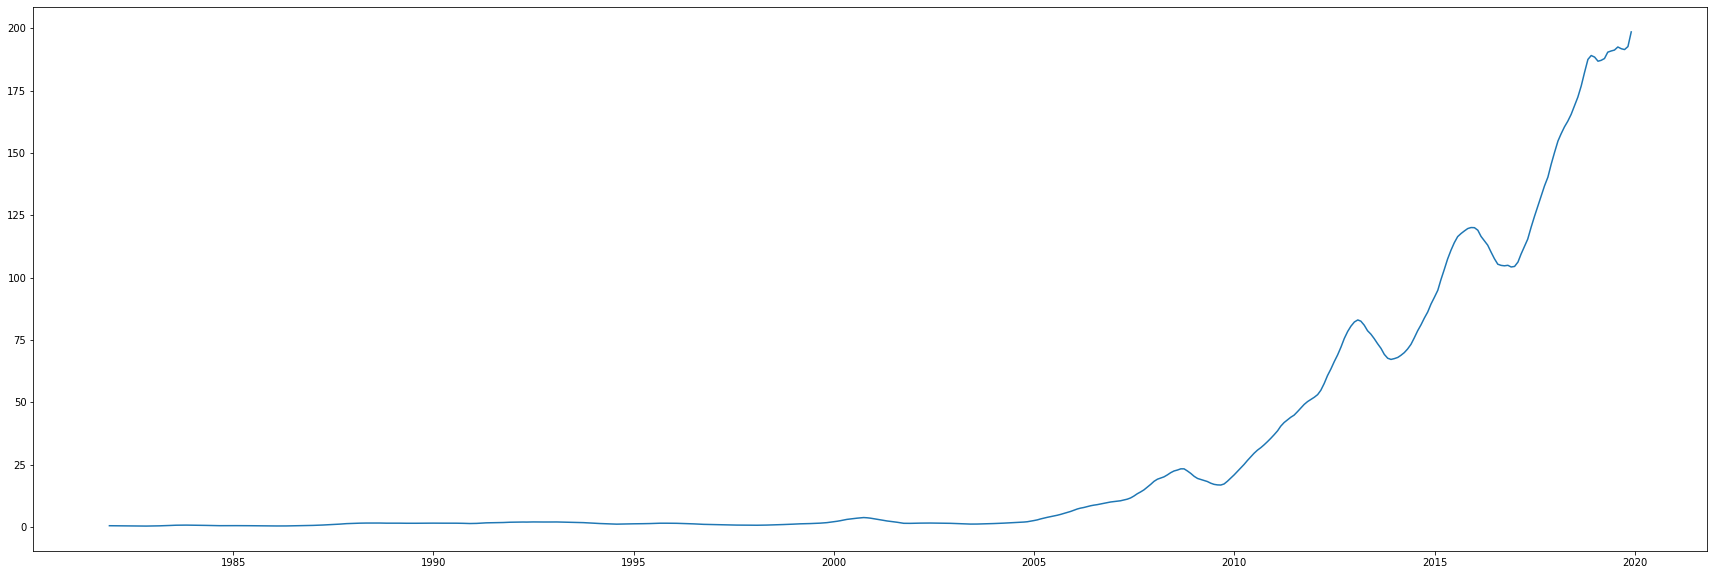

In [119]:
plt.figure(figsize=[30,10])
plt.plot(f2['Close'].rolling(12).mean())

In [120]:
f2['Close']-f2['Close'].rolling(12).mean()

Date
1980-12-31          NaN
1981-01-31          NaN
1981-02-28          NaN
1981-03-31          NaN
1981-04-30          NaN
                ...    
2019-07-31    12.638819
2019-08-31    13.079212
2019-09-30    26.456374
2019-10-31    42.544491
2019-11-30    63.200802
Freq: M, Name: Close, Length: 468, dtype: float64

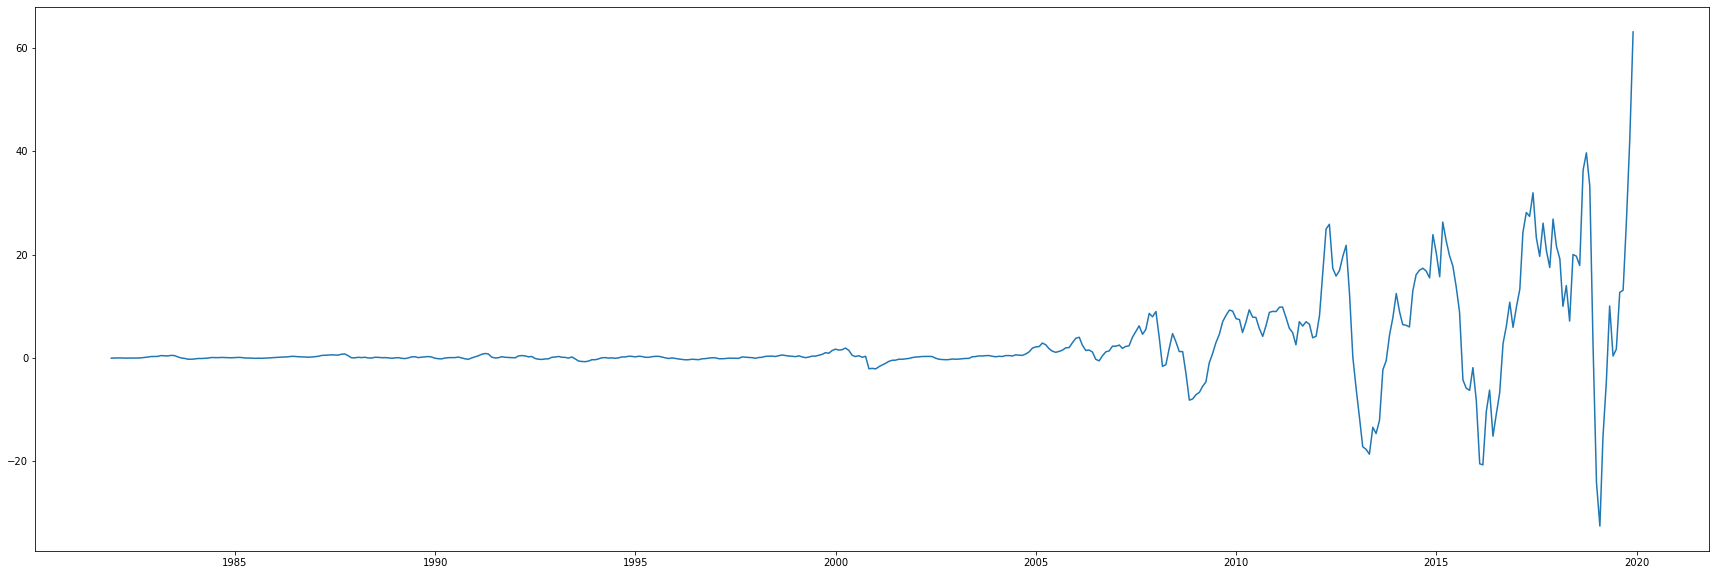

In [121]:
plt.figure(figsize=[30,10])
plt.plot(f2['Close']-f2['Close'].rolling(12).mean())

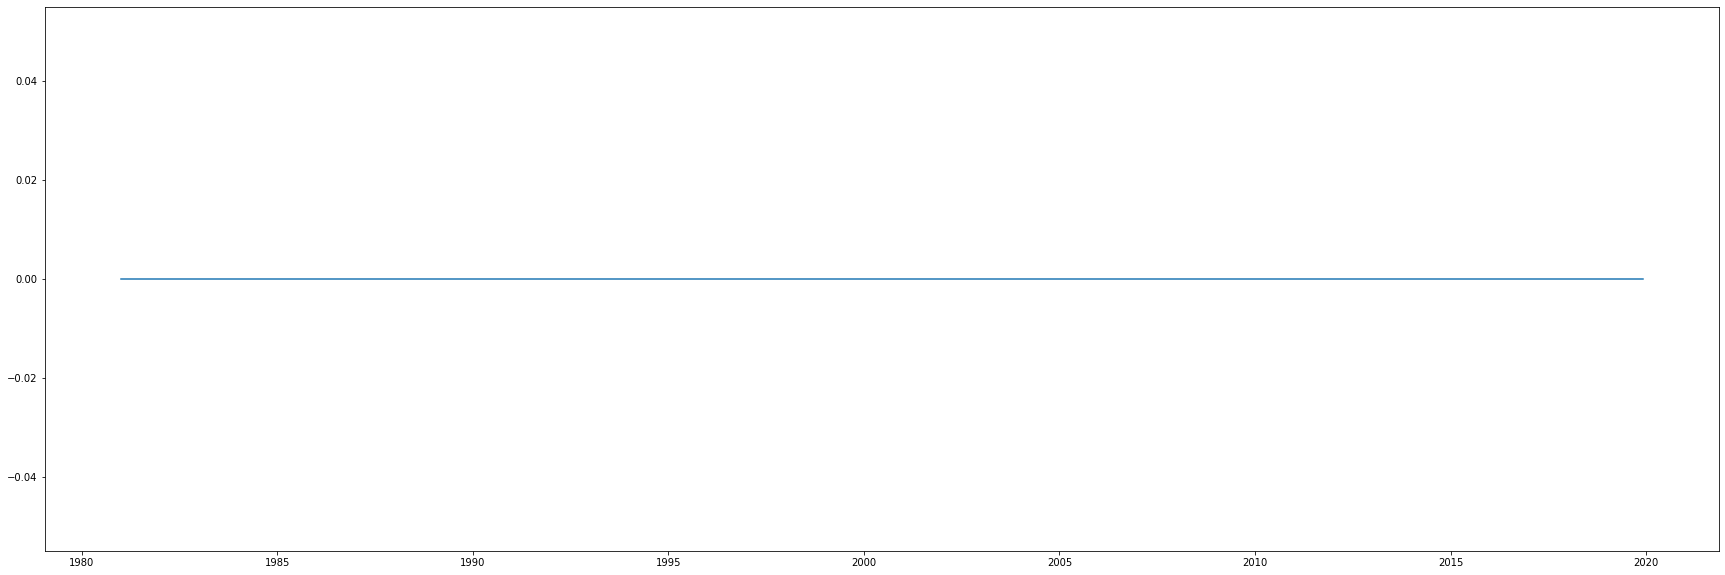

In [124]:
plt.figure(figsize=[30,10])
plt.plot(f2['Close']-f2['Close'].rolling(1).mean())

In [138]:
f2['Date']= f2.index

In [141]:
# list1= range(0,f2.shape)
range_= [x for x in range(0, f2['Close'].shape[0] )]

In [142]:
f2.shape

(468, 2)

In [148]:
# f2.set_index(range_,inplace=True)

In [145]:
f2.index.shape

(468,)

In [146]:
f2.index= range_

In [147]:
f2

,Close,Date
0,0.543613,1980-12-31
1,0.565264,1981-01-31
2,0.471570,1981-02-28
3,0.443486,1981-03-31
4,0.486182,1981-04-30
...,...,...
463,205.216364,2019-07-31
464,204.957728,2019-08-31
465,217.994999,2019-09-30
466,235.286521,2019-10-31


In [150]:
f2.rename({'Close':'y', 'Date': 'ds'}, axis=1, inplace= True)

In [152]:
f2

,y,ds
0,0.543613,1980-12-31
1,0.565264,1981-01-31
2,0.471570,1981-02-28
3,0.443486,1981-03-31
4,0.486182,1981-04-30
...,...,...
463,205.216364,2019-07-31
464,204.957728,2019-08-31
465,217.994999,2019-09-30
466,235.286521,2019-10-31


In [153]:
model= Prophet()

In [155]:
model.fit(f2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [158]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [174]:
future_dates= model.make_future_dataframe(periods= 24, freq='M')

In [175]:
future_dates

,ds
0,1980-12-31
1,1981-01-31
2,1981-02-28
3,1981-03-31
4,1981-04-30
...,...
487,2021-07-31
488,2021-08-31
489,2021-09-30
490,2021-10-31


In [176]:
f2.head(4)

,y,ds
0,0.543613,1980-12-31
1,0.565264,1981-01-31
2,0.471570,1981-02-28
3,0.443486,1981-03-31


In [177]:
prediction=model.predict(future_dates)

C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


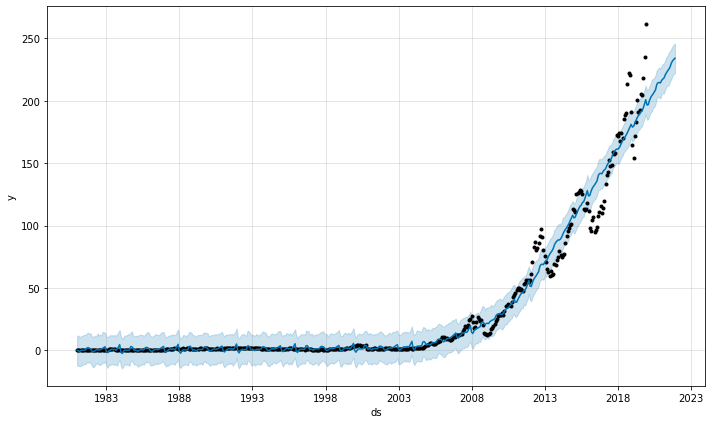

In [178]:
model.plot(prediction)
plt.show()

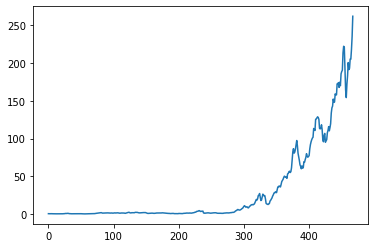

In [172]:
plt.plot(f2['y'])

In [173]:
file.tail()

,Close
Date,
2019-11-19,266.290009
2019-11-20,263.190002
2019-11-21,262.010010
2019-11-22,261.779999
2019-11-25,266.369995


In [ ]:
prediction.tail(12)

C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


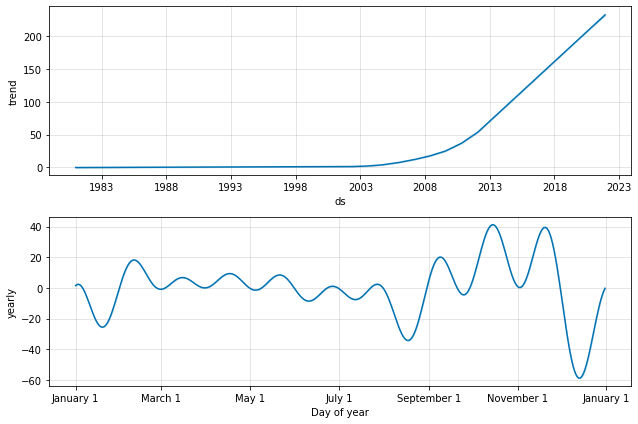

In [181]:
model.plot_components(prediction)
plt.show()

In [182]:
# from fbprophet.diagnostics import cross_validation
# df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
# df_cv.head()

# from fbprophet.diagnostics import performance_metrics
# df_p = performance_metrics(df_cv)
# df_p.head()

# from fbprophet.plot import plot_cross_validation_metric
# fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [183]:
from fbprophet.diagnostics import cross_validation


In [187]:
df_cv=cross_validation(model,horizon='365 days')

INFO:fbprophet:Making 70 forecasts with cutoffs between 1984-06-08 12:00:00 and 2018-11-30 00:00:00


  0%|          | 0/70 [00:00<?, ?it/s]

C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users

In [192]:
df_cv.tail(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
830,2019-02-28,175.439014,165.012682,186.222692,171.727893,2018-11-30
831,2019-03-31,176.676955,166.277179,187.712439,183.293810,2018-11-30
832,2019-04-30,177.546268,168.104346,187.806927,200.516191,2018-11-30
833,2019-05-31,180.339815,169.882044,190.368670,191.273637,2018-11-30
834,2019-06-30,181.491825,169.860116,191.984555,192.969000,2018-11-30
835,2019-07-31,183.097590,173.258651,194.415478,205.216364,2018-11-30
836,2019-08-31,184.193857,173.389230,194.635015,204.957728,2018-11-30
837,2019-09-30,186.012116,176.150715,196.968185,217.994999,2018-11-30
838,2019-10-31,187.919328,177.629529,198.464892,235.286521,2018-11-30
839,2019-11-30,189.185401,178.888368,200.173090,261.825298,2018-11-30


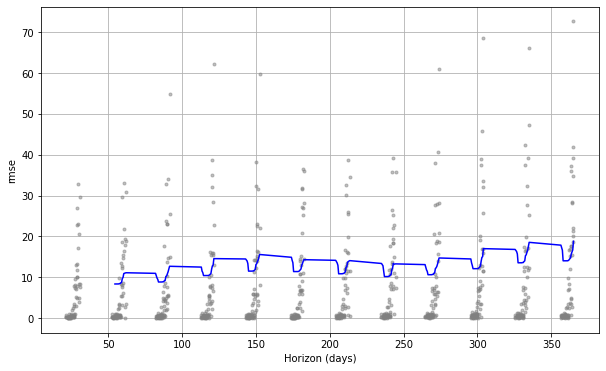

In [189]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')